In [2]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
import nltk
import string
import numpy as np
import pandas as pd
import os
import fasttext
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM

import fasttext.util
from gensim.models import KeyedVectors


Using TensorFlow backend.


In [3]:
df_raw=pd.read_csv('/Users/askvyas/Documents/Memology/OffensiveMemes.csv')
df_raw1=df_raw[['text_corrected','offensive']]
df_raw1

,text_corrected,offensive
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,not_offensive
1,The best of #10 YearChallenge! Completed in le...,not_offensive
2,Sam Thorne @Strippin ( Follow Follow Saw every...,not_offensive
3,10 Year Challenge - Sweet Dee Edition,very_offensive
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,very_offensive
...,...,...
6987,Tuesday is Mardi Gras Wednesday is Valentine's...,very_offensive
6988,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,not_offensive
6989,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,slight
6990,When I have time is a fantasy. no one has time...,not_offensive


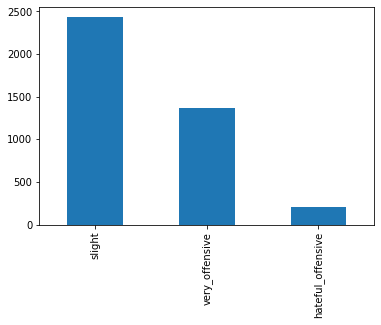

In [77]:
df_raw.offensive.value_counts().plot(kind='bar')

In [4]:

import pandas as pd
import re
df_raw1['text_corrected']=df_raw1['text_corrected'].astype(str)
df_raw1['text_corrected'] = df_raw1.fillna({'data':""})
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text
# apply the above function to df['text']
df_raw1['text_corrected'] = df_raw1.fillna({'data':''})

df_raw1['text_corrected'] = df_raw1['text_corrected'].apply(lambda x: clean_text(x))


/Users/askvyas/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/askvyas/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/askvyas/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A valu

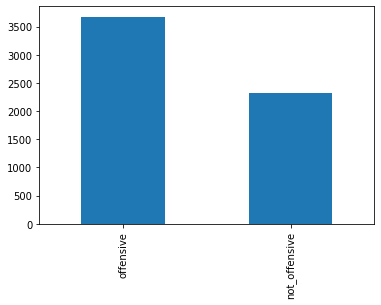

In [5]:
#Model1
def chge(df_raw1):
    if(df_raw1['offensive']=='not_offensive'):
         return 'not_offensive'
    else:
        return 'offensive'
df_bin=df_raw1[['text_corrected','offensive']]
df_bin= df_bin.assign(binary = df_bin.apply(chge, axis=1))
vld_bin=df_bin.tail(991)
df_bin=df_bin.head(6000)
vld_bin.binary.value_counts().plot(kind='bar')
df_bin.binary.value_counts().plot(kind='bar')

In [6]:
#Binary Training
data_f=df_bin

data_f = data_f.rename(columns={"text_corrected":"text", "binary":"label"})


data_f['label'] = '__label__' + data_f['label'].astype(str)
data_f.to_csv('bin3nt.txt', sep='\t', index = False, header = False)



three_train_data=os.getcwd()+'/bin3nt.txt'
print(three_train_data)


#Binary Testing
data_t=pd.DataFrame(vld_bin, columns = ['text_corrected', 'binary'])

data_t = data_t.rename(columns={"text_corrected":"text", "binary":"label"})


data_t['label'] = '__label__' + data_t['label'].astype(str)
data_t.to_csv('bin_3n.txt', sep='\t', index = False, header = False)


three_test_data=os.getcwd()+'/bin_3n.txt'
print(three_test_data)

/Users/askvyas/Documents/Memes/bin3nt.txt
/Users/askvyas/Documents/Memes/bin_3n.txt


In [7]:
data_t

,text,label
6001,name voldemort who that memes maker com,__label__not_offensive
6002,taken call liam neeson 0 0,__label__offensive
6003,tom jerry realest beef time never said word sight,__label__offensive
6004,priest throw holy water person possessed witho...,__label__not_offensive
6005,joins military gets kitchen duty quickmeme com,__label__not_offensive
...,...,...
6987,tuesday mardi gras wednesday valentine friday ...,__label__offensive
6988,must watch movies 2017 iti chennai memes maana...,__label__not_offensive
6989,less talking planning soda junk food complaini...,__label__offensive
6990,time fantasy one time unless make time arhtist...,__label__not_offensive


In [59]:
model = KeyedVectors.load_word2vec_format('/Users/askvyas/Documents/wiki-news-300d-1M.vec')
hyper_params = {"lr": 0.01,
                        "epoch": 30,
                        "wordNgrams": 2,
                        "dim": 300,
               "pretrainedVectors":'/Users/askvyas/Documents/wiki-news-300d-1M.vec'
               }


model = fasttext.train_supervised(input=three_train_data, **hyper_params)
result = model.test(three_test_data)
        
print(result)

(991, 0.6084762865792129, 0.6084762865792129)


In [9]:
#for 3 classes
df_raw=df_raw[df_raw['offensive']!='not_offensive']
df_raw.offensive.value_counts()
vld_tr=df_raw.tail(270)
df_raw=df_raw.head(4000)

In [10]:
# Training 3 classes
data_f=pd.DataFrame(df_raw, columns = ['text_corrected', 'offensive'])

data_f = data_f.rename(columns={"text_corrected":"text", "offensive":"label"})


data_f['label'] = '__label__' + data_f['label'].astype(str)
data_f.to_csv('bin32nt.txt', sep='\t', index = False, header = False)

data_f.label.value_counts()

threet_train_data=os.getcwd()+'/bin32nt.txt'
print(threet_train_data)
# Testing 3 classes
data_t=pd.DataFrame(vld_tr, columns = ['text_corrected', 'offensive'])

data_t = data_t.rename(columns={"text_corrected":"text", "offensive":"label"})


data_t['label'] = '__label__' + data_t['label'].astype(str)
data_t.to_csv('bin_32n.txt', sep='\t', index = False, header = False)


threet_test_data=os.getcwd()+'/bin_32n.txt'
print(threet_test_data)

/Users/askvyas/Documents/Memes/bin32nt.txt
/Users/askvyas/Documents/Memes/bin_32n.txt


In [11]:
model_t = fasttext.train_supervised(input=threet_train_data, **hyper_params)


In [12]:
hyper_params = {"lr": 0.01,
                        "epoch": 30,
                        "wordNgrams": 2,
                        "dim": 300,
               "pretrainedVectors":'/Users/askvyas/Documents/wiki-news-300d-1M.vec'
               }


model_t = fasttext.train_supervised(input=threet_train_data, **hyper_params)
result = model_t.test(threet_test_data)
        
print(result)

(270, 0.562962962962963, 0.562962962962963)


In [13]:
#Using Keras And Embeddings for 2 classes
### Create sequence
df_bin['text_corrected']=df_bin['text_corrected'].astype(str)
vocabulary_size = 40000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(df_bin['text_corrected'])
sequences = tokenizer.texts_to_sequences(df_bin['text_corrected'])
data = pad_sequences(sequences, maxlen=50)

In [14]:
f = open('/Users/askvyas/Documents/wiki-news-300d-1M.vec', encoding = 'utf8')
embeddings_index = dict()
for line in f:
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
embedding_matrix = np.zeros((40000, 300))
for word, index in tokenizer.word_index.items():
    if index > 40000 - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [15]:
model_glove = Sequential()
model_glove.add(Embedding(vocabulary_size, 300, input_length=50, weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(LSTM(100))
model_glove.add(Dense(1, activation='sigmoid'))


In [16]:
optimizer = keras.optimizers.Adam(lr=0.01)
model_glove.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [17]:
labels=df_bin.binary.map(lambda x:0 if x=='not_offensive' else 1)

In [18]:
model_glove.fit(data, np.array(labels), validation_split=0.2, epochs = 20)

Train on 4800 samples, validate on 1200 samples
Epoch 1/20
4800/4800 [==============================] - 7s 1ms/step - loss: 0.6740 - accuracy: 0.6062 - val_loss: 0.6590 - val_accuracy: 0.6308
Epoch 2/20
4800/4800 [==============================] - 6s 1ms/step - loss: 0.6640 - accuracy: 0.6094 - val_loss: 0.6607 - val_accuracy: 0.6300
Epoch 3/20
4800/4800 [==============================] - 5s 1ms/step - loss: 0.6384 - accuracy: 0.6365 - val_loss: 0.6757 - val_accuracy: 0.5958
Epoch 4/20
4800/4800 [==============================] - 5s 1ms/step - loss: 0.5541 - accuracy: 0.7171 - val_loss: 0.7166 - val_accuracy: 0.6042
Epoch 5/20
4800/4800 [==============================] - 5s 1ms/step - loss: 0.4069 - accuracy: 0.8090 - val_loss: 0.8526 - val_accuracy: 0.5617
Epoch 6/20
4800/4800 [==============================] - 5s 1ms/step - loss: 0.2978 - accuracy: 0.8658 - val_loss: 0.9473 - val_accuracy: 0.5308
Epoch 7/20
4800/4800 [==============================] - 5s 1ms/step - loss: 0.2329 - acc

In [19]:
data_t.to_csv('bin_32n.csv', index = False)
data_f.to_csv('bin32nt.csv',  index = False)


In [20]:
dtap=pd.read_csv('bin32nt.csv')

In [ ]:
import sys
import os
import nltk
nltk.download('punkt')
import csv
import datetime
from bs4 import BeautifulSoup
import re
import itertools
import emoji


def load_dict_smileys():
    
    return {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }


def load_dict_contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks"
        }


def strip_accents(text):
    if 'ø' in text or  'Ø' in text:
        #Do nothing when finding ø 
        return text   
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)


In [ ]:
from bs4 import BeautifulSoup

def tweet_cleaning_for_sentiment_analysis(tweet):    
    
    #Escaping HTML characters
    tweet = BeautifulSoup(tweet).get_text()
    #Special case not handled previously.
    tweet = tweet.replace('\x92',"'")
    #Removal of hastags/account
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split())
    #Removal of address
    tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split())
    #Removal of Punctuation
    tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split())
    #Lower case
    tweet = tweet.lower()
    #CONTRACTIONS source: https://en.wikipedia.org/wiki/Contraction_%28grammar%29
    CONTRACTIONS = load_dict_contractions()
    tweet = tweet.replace("’","'")
    words = tweet.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    tweet = " ".join(reformed)
    # Standardizing words
    tweet = ''.join(''.join(s)[:2] for _, s in itertools.groupby(tweet))
    #Deal with smileys
    #source: https://en.wikipedia.org/wiki/List_of_emoticons
    SMILEY = load_dict_smileys()  
    words = tweet.split()
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    tweet = " ".join(reformed)
    #Deal with emojis
    tweet = emoji.demojize(tweet)
    #Strip accents
    tweet= strip_accents(tweet)
    tweet = tweet.replace(":"," ")
    tweet = ' '.join(tweet.split())
    
    # DO NOT REMOVE STOP WORDS FOR SENTIMENT ANALYSIS - OR AT LEAST NOT NEGATIVE ONES

    return tweet



In [ ]:
import csv
def transform_instance(row):
    cur_row = []
    label =  row[1]  
    cur_row.append(label)
    cur_row.extend(nltk.word_tokenize(tweet_cleaning_for_sentiment_analysis(row[0].lower())))
    return cur_row


def preprocess(input_file, output_file, keep=1):
    i=0
    with open(output_file, 'w') as csvoutfile:
        csv_writer = csv.writer(csvoutfile, delimiter=' ', lineterminator='\n')
        with open(input_file, 'r', newline='') as csvinfile: #,encoding='latin1'
            csv_reader = csv.reader(csvinfile, delimiter=',', quotechar='"')
            for row in csv_reader:
                if row[1]!="__label__not_offensive" and row[1] in ['__label__hateful_offensive','__label__very_offensive','__label__slight'] and row[0]!='':
                    row_output = transform_instance(row)
                    csv_writer.writerow(row_output )
                i=i+1
                if i%10000 ==0:
                    print(i)
            
# Preparing the training dataset        
preprocess('bin32nt.csv', 'tweets.train')

# Preparing the validation dataset        
preprocess('bin_32n.csv', 'tweets.validation')


In [22]:
import csv
with open('bin_32n.csv', 'r', newline='') as csvinfile:
    csv_reader = csv.reader(csvinfile, delimiter=',', quotechar='"')
    for row in csv_reader:
        print(row)

['text', 'label']
['LET ME TELL YOU ABOUT MY SCHOOL made on imeur', '__label__slight']
['X-MEN: FIRST CLASS DRINKING GAME TAKE A BIG SWIG EVERY TIME XAVIER DOES THIS... quickmeme.com', '__label__slight']
['ALAT ACCORDING TO THIS... CCC YOU ARE NOT THE FATHER!', '__label__very_offensive']
['If a lizard wore pants would he wear them like this or like this?', '__label__very_offensive']
['MARK ZUCKERBERG IS DELIVERING A RUSTY TROMBONE IF YOU RE-POST THIS PHOTO', '__label__slight']
['IF MARK ZUCKERBERG. OWNER OF THE TWO BIGGEST SOCIAL NETWORKS ON THE PLANET COVERS HIS CAMERA AND MICROPHONE. MAYBE YOU SHOULD TOO!', '__label__very_offensive']
["LET'S FINISH SCHOOL SAID NO IT BILLIONAIRES EVER. memecenter.com MemeCenter", '__label__slight']
['\ufeffNBC WHEN YOUR FRIENDS ASK HOW DRUNK YOU WERE LAST NIGHT "I do not recall it..." ATTORNEY GENERAL I DO', '__label__slight']
["NO  MARK ZUCKERBERG WE WON'T GO TO THE BACK OF THE FACEBOOK BUS!", '__label__slight']
['Stop sasuke meme & focus on #10yearc

In [23]:
def upsampling(input_file, output_file, ratio_upsampling=1):
    # Create a file with equal number of tweets for each label
    #    input_file: path to file
    #    output_file: path to the output file
    #    ratio_upsampling: ratio of each minority classes vs majority one. 1 mean there will be as much of each class than there is for the majority class 
    
    i=0
    counts = {}
    dict_data_by_label = {}

    # GET LABEL LIST AND GET DATA PER LABEL
    with open(input_file, 'r', newline='') as csvinfile: 
        csv_reader = csv.reader(csvinfile, delimiter=',', quotechar='"')
        for row in csv_reader:
            counts[row[0].split()[0]] = counts.get(row[0].split()[0], 0) + 1
            if not row[0].split()[0] in dict_data_by_label:
                dict_data_by_label[row[0].split()[0]]=[row[0]]
            else:
                dict_data_by_label[row[0].split()[0]].append(row[0])
            i=i+1
            if i%10000 ==0:
                print("read" + str(i))

    # FIND MAJORITY CLASS
    majority_class=""
    count_majority_class=0
    for item in dict_data_by_label:
        if len(dict_data_by_label[item])>count_majority_class:
            majority_class= item
            count_majority_class=len(dict_data_by_label[item])  
    
    # UPSAMPLE MINORITY CLASS
    data_upsampled=[]
    for item in dict_data_by_label:
        data_upsampled.extend(dict_data_by_label[item])
        if item != majority_class:
            items_added=0
            items_to_add = count_majority_class - len(dict_data_by_label[item])
            while items_added<items_to_add:
                data_upsampled.extend(dict_data_by_label[item][:max(0,min(items_to_add-items_added,len(dict_data_by_label[item])))])
                items_added = items_added + max(0,min(items_to_add-items_added,len(dict_data_by_label[item])))

    # WRITE ALL
    i=0

    with open(output_file, 'w') as txtoutfile:
        for row in data_upsampled:
            txtoutfile.write(row+ '\n' )
            i=i+1
            if i%10000 ==0:
                print("writer" + str(i))


upsampling( 'tweets.train','uptweets.train')


In [24]:
upsampling( 'tweets.train','uptweets1.csv')


In [25]:
uptwt=os.getcwd()+'/upsmpl.train'

In [26]:
uptwt

'/Users/askvyas/Documents/Memes/uptweets.train'

In [27]:
model = KeyedVectors.load_word2vec_format('/Users/askvyas/Documents/wiki-news-300d-1M.vec')
hyper_params = {"lr": 0.01,
                        "epoch": 30,
                        "wordNgrams": 2,
                        "dim": 300,
               "pretrainedVectors":'/Users/askvyas/Documents/wiki-news-300d-1M.vec'
               }


model_up = fasttext.train_supervised(input=uptwt, **hyper_params)


In [79]:
print(model_up.test('tweets.validation'))
print(model_up.test(uptwt))
model_up.test_label('tweets.validation')

(270, 0.9888888888888889, 0.9888888888888889)
(7284, 0.9972542559033498, 0.9972542559033498)


{'__label__hateful_offensive': {'precision': 0.9411764705882353,
  'recall': 1.0,
  'f1score': 0.9696969696969697},
 '__label__slight': {'precision': 0.99375,
  'recall': 0.99375,
  'f1score': 0.99375},
 '__label__very_offensive': {'precision': 0.989247311827957,
  'recall': 0.9787234042553191,
  'f1score': 0.983957219251337}}

(7284, 0.9972542559033498, 0.9972542559033498)

{'__label__hateful_offensive': {'precision': 0.9411764705882353,
  'recall': 1.0,
  'f1score': 0.9696969696969697},
 '__label__slight': {'precision': 0.99375,
  'recall': 0.99375,
  'f1score': 0.99375},
 '__label__very_offensive': {'precision': 0.989247311827957,
  'recall': 0.9787234042553191,
  'f1score': 0.983957219251337}}

In [38]:
model_up.predict("Nigga")

(('__label__hateful_offensive',), array([0.52335572]))

In [43]:

import pandas as pd
import re
import string
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower()
    
    ## Remove stop words
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", "  ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", "  ", text)
    text = re.sub(r"\+", "  ", text)
    text = re.sub(r"\-", "  ", text)
    text = re.sub(r"\=", "  ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text


In [73]:
import cv2
import pytesseract
from PIL import Image
image = cv2.imread('/Users/askvyas/Desktop/001.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("",gray)
text2 = pytesseract.image_to_string(gray)
text=str(clean_text(text2))
res1=model.predict(text)
s1=res1[0][0]
a1=res1[1][0]
if((s1=='__label__offensive')&(a1>0.65)):
    res2=model_up.predict(text)
    s2=res2[0][0]
    a2=res2[1][0]
else:
    s2=s1
    a2=a1
    
print(s2+"  "+ str(a2))


__label__slight  0.8096247911453247
